In [24]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import cv2 
import os
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

print("Libraries imported Successfully")


Libraries imported Successfully


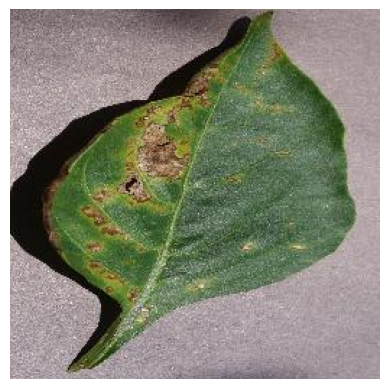

In [25]:
#Load & Display an Image

dataset_path = "D:/mansi codes/PlantVillage"  
image_folder = "Pepper__bell___Bacterial_spot"  # Change as needed  
image_name = os.listdir(os.path.join(dataset_path, image_folder))[0]  # Get first image  
image_path = os.path.join(dataset_path, image_folder, image_name)  

img = cv2.imread(image_path)  
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB  

plt.imshow(img)  
plt.axis("off")  
plt.show()


In [26]:
#Data Preprocessing
# Define dataset path
dataset_path = "D:/mansi codes/PlantVillage"  # Change as needed 
img_size = (128, 128)  # Resizing all images to 224x224

# Lists to store images and labels
images = []
labels = []

# Get class names (subfolders in the dataset folder)
class_names = os.listdir(dataset_path)
class_to_index = {class_name: i for i, class_name in enumerate(class_names)}  # Assign index to each class

# Loop through each class folder
for class_name in class_names:
    class_folder = os.path.join(dataset_path, class_name)
    
    # Check if it's a directory
    if os.path.isdir(class_folder):
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            
            # Read image using OpenCV
            img = cv2.imread(img_path)
            if img is None:
                continue  # Skip if the image is not readable
            
            # Resize image
            img = cv2.resize(img, img_size)
            
            # Normalize pixel values (0 to 1 range)
            img = img / 255.0
            
            # Append to lists
            images.append(img)
            labels.append(class_to_index[class_name])

# Convert lists to NumPy arrays
images = np.array(images, dtype=np.float32)
labels = np.array(labels, dtype=np.int32)

# Print dataset shape
print("Dataset loaded successfully!")
print("Total Images:", images.shape[0])
print("Image Shape:", images.shape[1:])
print("Total Classes:", len(class_names))


Dataset loaded successfully!
Total Images: 1374
Image Shape: (128, 128, 3)
Total Classes: 2


In [27]:
import os
import numpy as np
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1️⃣ Set Dataset Path
dataset_path = "D:/mansi codes/PlantVillage"  # Change as needed

# 2️⃣ Load Image Data
image_size = (128, 128)  # Resize images to a standard size
images = []
labels = []
class_names = os.listdir(dataset_path)  # List of categories (disease names)
class_mapping = {class_name: i for i, class_name in enumerate(class_names)}

for class_name in class_names:
    class_dir = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue  # Skip if the image is unreadable
        img = cv2.resize(img, image_size)  # Resize image
        images.append(img)
        labels.append(class_mapping[class_name])  # Assign label

# Convert lists to NumPy arrays
images = np.array(images, dtype="float32") / 255.0  # Normalize pixel values
labels = np.array(labels)

# 3️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# 4️⃣ One-Hot Encoding Labels
num_classes = len(class_names)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# 5️⃣ Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),  # Helps prevent overfitting
    Dense(num_classes, activation="softmax")  # Output layer
])

# 6️⃣ Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

# 7️⃣ Train Model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# 8️⃣ Save Model
model.save("crop_disease_model.h5")

print("✅ Model training complete and saved as 'crop_disease_model.h5'")


c:\Users\calci\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 282ms/step - accuracy: 0.6859 - loss: 0.8590 - val_accuracy: 0.8400 - val_loss: 0.3989
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 241ms/step - accuracy: 0.8500 - loss: 0.3468 - val_accuracy: 0.9091 - val_loss: 0.2139
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 227ms/step - accuracy: 0.8818 - loss: 0.2791 - val_accuracy: 0.8327 - val_loss: 0.4082
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 222ms/step - accuracy: 0.9062 - loss: 0.2650 - val_accuracy: 0.9273 - val_loss: 0.2003
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 233ms/step - accuracy: 0.9642 - loss: 0.1176 - val_accuracy: 0.9055 - val_loss: 0.2379
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 234ms/step - accuracy: 0.9680 - loss: 0.1075 - val_accuracy: 0.9200 - val_loss: 0.2256
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 261ms/step - accuracy: 0.9820 - loss: 0.0584 - val_accuracy: 0.9382 - val_loss: 0.1646
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.9852 - loss: 0.0408 - val_accuracy: 

✅ Model training complete and saved as 'crop_disease_model.h5'


In [28]:
#Evaluating Model

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9432 - loss: 0.1666
Test Accuracy: 0.95


In [29]:
#Loading and Saving the model
from tensorflow.keras.models import load_model
model.save("crop_disease_model.h5")
loaded_model = load_model("crop_disease_model.h5")

In [31]:
#Testing with a new image

#model expectations
print("Expected Model Input Shape:",model.input_shape)

from PIL import Image
# Load your trained model
model = tf.keras.models.load_model("your_model_path.h5")  # Update with your model path

# Define class names (modify based on your dataset)
class_names = ["class1", "class2", "class3"]  # Update with actual class labels

# Function to preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")  # Ensure it's RGB
    img = img.resize((128, 128))  # Resize to match model input shape
    img = np.array(img) / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to predict class of an image
def predict_image(image_path, class_names):
    img = preprocess_image(image_path)  # Preprocess the image
    print("Processed Image Shape:", img.shape)  # Debugging output
    
    prediction = model.predict(img)  # Get model prediction
    class_index = np.argmax(prediction)  # Get index of highest probability class
    return class_names[class_index]

# Test with a new image
image_path = "C:\\Users\\calci\\Downloads\\leaf.jpg"  # Update with actual image path
predicted_class = predict_image(image_path, class_names)

print(f"Predicted Class: {predicted_class}")


Expected Model Input Shape: (None, 128, 128, 3)


In [33]:
print(model.output_shape)
print(model.summary())

(None, 2)
